In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [4]:
# Download training data from open datasets.
# training_data = datasets.FashionMNIST(
training_data = datasets.EMNIST(
    root="data",
    split="byclass",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
# test_data = datasets.FashionMNIST(
test_data = datasets.EMNIST(
    root="data",
    split="byclass",
    train=False,
    download=True,
    transform=ToTensor(),
)
print(training_data)
print(test_data)

Dataset EMNIST
    Number of datapoints: 697932
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset EMNIST
    Number of datapoints: 116323
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [21]:
batch_size=64

#Create data loaders.
train_dataloader=DataLoader(training_data, batch_size=batch_size)
test_dataloader=DataLoader(test_data, batch_size=batch_size)

for X,y in test_dataloader:
    print("shape of X [N, C, H, W]", X.shape)
    print("shape of y: ", y.shape, y.dtype)
    break

shape of X [N, C, H, W] torch.Size([64, 1, 28, 28])
shape of y:  torch.Size([64]) torch.int64


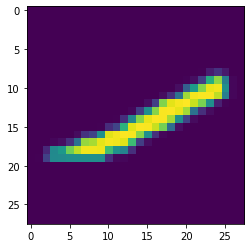

In [22]:
plt.imshow(X[0,0])
plt.show()

In [23]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Get cpu (or gpu) device for training.
device = "cpu" # normally: "gpu" if torch.cuda.is_available() else "cpu"
print("using {}".format(device))

#Define Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear( 28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
using cpu
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer2 = torch.optim.Adam(model.parameters(), lr=1e-4)

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        #Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model):
    size =  len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [26]:
epochs = 10
print("training with crossentropy optimizer")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer1)
    test(test_dataloader, model)
print("Done")


training with crossentropy optimizer
Epoch 1
-------------------------------


IndexError: Target 35 is out of bounds.

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")